In [15]:
# 농어(perch) 데이터
import numpy as np
from sklearn.model_selection import train_test_split 

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# Reshape로 차원 변환 필요(1차원 배열 -> 2차원 배열)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


농어 데이터 : http://bit.ly/perch_data
## 선형 회귀(Linear Regression)

- 모델 파라미터 : 알고리즘이 찾아낸 직선을 찾아내는 속성 값
  - 훈련 후 절편(intercept_) 값과 계수(coef_)를 얻을 수 있음

```mermaid
flowchart LR
    id(LinearRegression) --> fit
    fit --> coef_
    fit --> intercetp_
```

[1241.83860323]
계수: [39.01714496] , 절편: -709.0186449535474


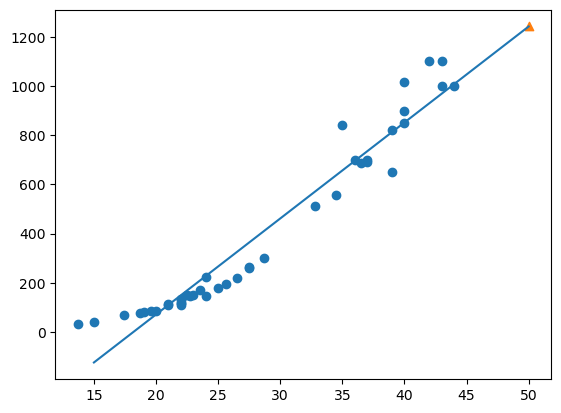

In [20]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(train_input, train_target) # 훈련

# 50cm 농어에 대한 예측
predict = lr.predict([[50]])
print(predict)
print('계수:', lr.coef_, ', 절편:', lr.intercept_)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프(직선을 그려보는 것
plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, predict, marker='^')
plt.show()

# 무게가 0인 경우엔 길이 데이터가 어떻게 될까?

## 다항 회귀(Polynomial Regression)

- 선형 회귀의 문제점 해결
  - 직선보다 곡선 을 이용
    $$무게 = a \times 길이^2 + b \times 길이 + c$$
- 2차 방정식의 곡선
  - 길이에 해당되는 값의 제곱한 항을 훈련 세트에 포함 [[길이값 제곱항, 길이값], ...]

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278338


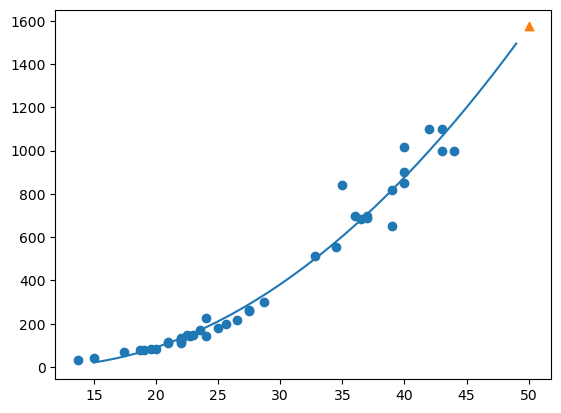

0.9706807451768623
0.9775935108325122 [과소 적합]


In [26]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

predict = lr.predict([[50 ** 2, 50]])
print(predict)

print(lr.coef_, lr.intercept_)

# 구간 별 직선을 그리기 위해 15에서 49까지의 정수 배열 생성
point = np.arange(15,50)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15~49의 2차 방정식 그래프
plt.plot(point, (lr.coef_[0] * point ** 2) + (lr.coef_[1] * point + lr.intercept_))

# 50cm 농어 데이터
plt.scatter([50], predict, marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target), '[과소 적합]')


### 과소적합 상태
- 앞의 두 가지 경우(선형회귀, 다항회귀)에 모두 과소적합 상태이다.
- 과소적합을 해결하기 위해 모델을 더 복잡하게 생성
- 훈련 데이터 특성을 더 많이 포함(다항 특성)
  - 길이, 높이, 두께 등

In [27]:
# 판다스를 이용한 데이터 읽기
# csv -> pd.read_csv() : Pandas Dataframe -> to_numpy() : numpy array
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

## 변환기(Transformer)
- 특성을 만들거나 전처리 하기 위한 클래스
- PolynomialFeatures
- fit(), transform() 메서드 제공
  - fit() 실행 후 transform() 실행 가능

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# degress = 2
poly = PolynomialFeatures()
# 트랜스포머의 fit() 메서드는 타깃 데이터 없이 입력 데이터 변환 가능
poly.fit([[2, 3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
# 다항식의 절편값이 없어도 무관
print(poly.transform([[2, 3]]))

poly = PolynomialFeatures(include_bias=False) # 절편값 생성을 하지 않는 옵션

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)
print(poly.get_feature_names_out())

test_poly = poly.transform(test_input)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

[[1. 2. 3. 4. 6. 9.]]
(42, 2)
['x0' 'x0^2']
0.9706807451768623
0.9775935108325123


- transform을 적용하여 어느 정도 과소적합 문제가 해소됨

### 더 많은 특성 만들기
- 매개변수를 이용한 특성 추가
- degree = 5 (5 제곱까지 특성 추가)

In [37]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target)) # 특성의 개수가 많아져 훈련 점수가 크게 향상
print(lr.score(test_poly, test_target)) # 특성의 개수를 크게 늘리면 과대적합이 발생

(42, 5)
0.9739334260896342
0.9825340930243429


## 규제(regularization)
모델이 훈련 세트를 너무 과도하게 학습하지 못하게 제어
- 과대적합되지 않도록 하는 방법 중의 한 가지
- Lidge 와 Lasso

### 표준화
- 곱셈의 계수값이 급격히 차이나는 것을 방지하기 위함
- 특성의 스케일을 정규화
- StandardScalar 클래스 사용 (fit 먼저 수행)

In [40]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

# 선형 회귀에 비해 훈련 점수가 조금 낮아짐
print(ridge.score(train_scaled, train_target))
# 많은 특성의 사용에도 불구하고 과대 적합이 줄어듬
print(ridge.score(test_scaled, test_target))

0.9675257933461249
0.966583399655266


### 규제 강도 찾기
- alpha 값을 이용하여 규제 정도를 제어 함
- 적절한 alpha 값을 찾기 위해 $R^2$ 값의 그래프를 이용
- alpha 값을 0.001에서 100까지 10배씩 증가하여 모델 훈련
  - 훈련 세트와 테스트 세트의 점수를 리스트에 저장